# Load

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor,LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv("HW3_movie_metadata.csv")
df_for_ref = pd.read_csv("HW3_movie_metadata.csv")

In [22]:
pd.options.display.float_format = '{:.0f}'.format

# Explore

In [23]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054,English,USA,PG-13,237000000,2009,936,8,2,33000
1,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,Johnny Depp,...,1238,English,USA,PG-13,300000000,2007,5000,7,2,0
2,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,Christoph Waltz,...,994,English,UK,PG-13,245000000,2015,393,7,2,85000
3,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,Tom Hardy,...,2701,English,USA,PG-13,250000000,2012,23000,8,2,164000
4,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12,7,NaN,0


In [24]:
df.tail()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Scott Smith,1,87,2,318,Daphne Zuniga,637,NaN,Comedy|Drama,Eric Mabius,...,6,English,Canada,NaN,NaN,2013,470,8,NaN,84
5039,NaN,43,43,NaN,319,Valorie Curry,841,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,...,359,English,USA,TV-14,NaN,NaN,593,8,16,32000
5040,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,NaN,Drama|Horror|Thriller,Eva Boehnke,...,3,English,USA,NaN,1400,2013,0,6,NaN,16
5041,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,Alan Ruck,...,9,English,USA,PG-13,NaN,2012,719,6,2,660
5042,Jon Gunn,43,90,16,16,Brian Herzlinger,86,85222,Documentary,John August,...,84,English,USA,PG,1100,2004,23,7,2,456


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

In [26]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993,5028,4939,5020,5036,4159,5043,5043,5030,5022,4551,4935,5030,5043,4714,5043
mean,140,107,687,645,6560,48468408,83668,9699,1,273,39752620,2002,1652,6,2,7526
std,122,25,2813,1665,15021,68452990,138485,18164,2,378,206114898,12,4042,1,1,19320
min,1,7,0,0,0,162,5,0,0,1,218,1916,0,2,1,0
25%,50,93,7,133,614,5340988,8594,1411,0,65,6000000,1999,281,6,2,0
50%,110,103,49,372,988,25517500,34359,3090,1,156,20000000,2005,595,7,2,166
75%,195,118,194,636,11000,62309438,96309,13756,2,326,45000000,2011,918,7,2,3000
max,813,511,23000,23000,640000,760505847,1689764,656730,43,5060,12215500000,2016,137000,10,16,349000


In [27]:
df.value_counts()

director_name     num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes  actor_2_name         actor_1_facebook_likes  gross     genres                                actor_1_name         movie_title          num_voted_users  cast_total_facebook_likes  actor_3_name     facenumber_in_poster  plot_keywords                                                      movie_imdb_link                                       num_user_for_reviews  language  country      content_rating  budget    title_year  actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes
Frank Oz          168                     87        0                        548                     Ewen Bremner         22000                   8579684   Comedy                                Peter Dinklage       Death at a Funeral   89547            24324                      Kris Marshall    0                     end credits roll call|four word title|funeral|secret|uncle         http://www.imdb.com/

In [28]:
df.isna().sum()

director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_name              4939 non-null   object 
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_2_name               5030 non-null   object 
 6   actor_1_facebook_likes     5036 non-null   float64
 7   gross                      4159 non-null   float64
 8   genres                     5043 non-null   object 
 9   actor_1_name               5036 non-null   object 
 10  movie_title                5043 non-null   object 
 11  num_voted_users            5043 non-null   int64  
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  actor_3_name               5020 non-null   objec

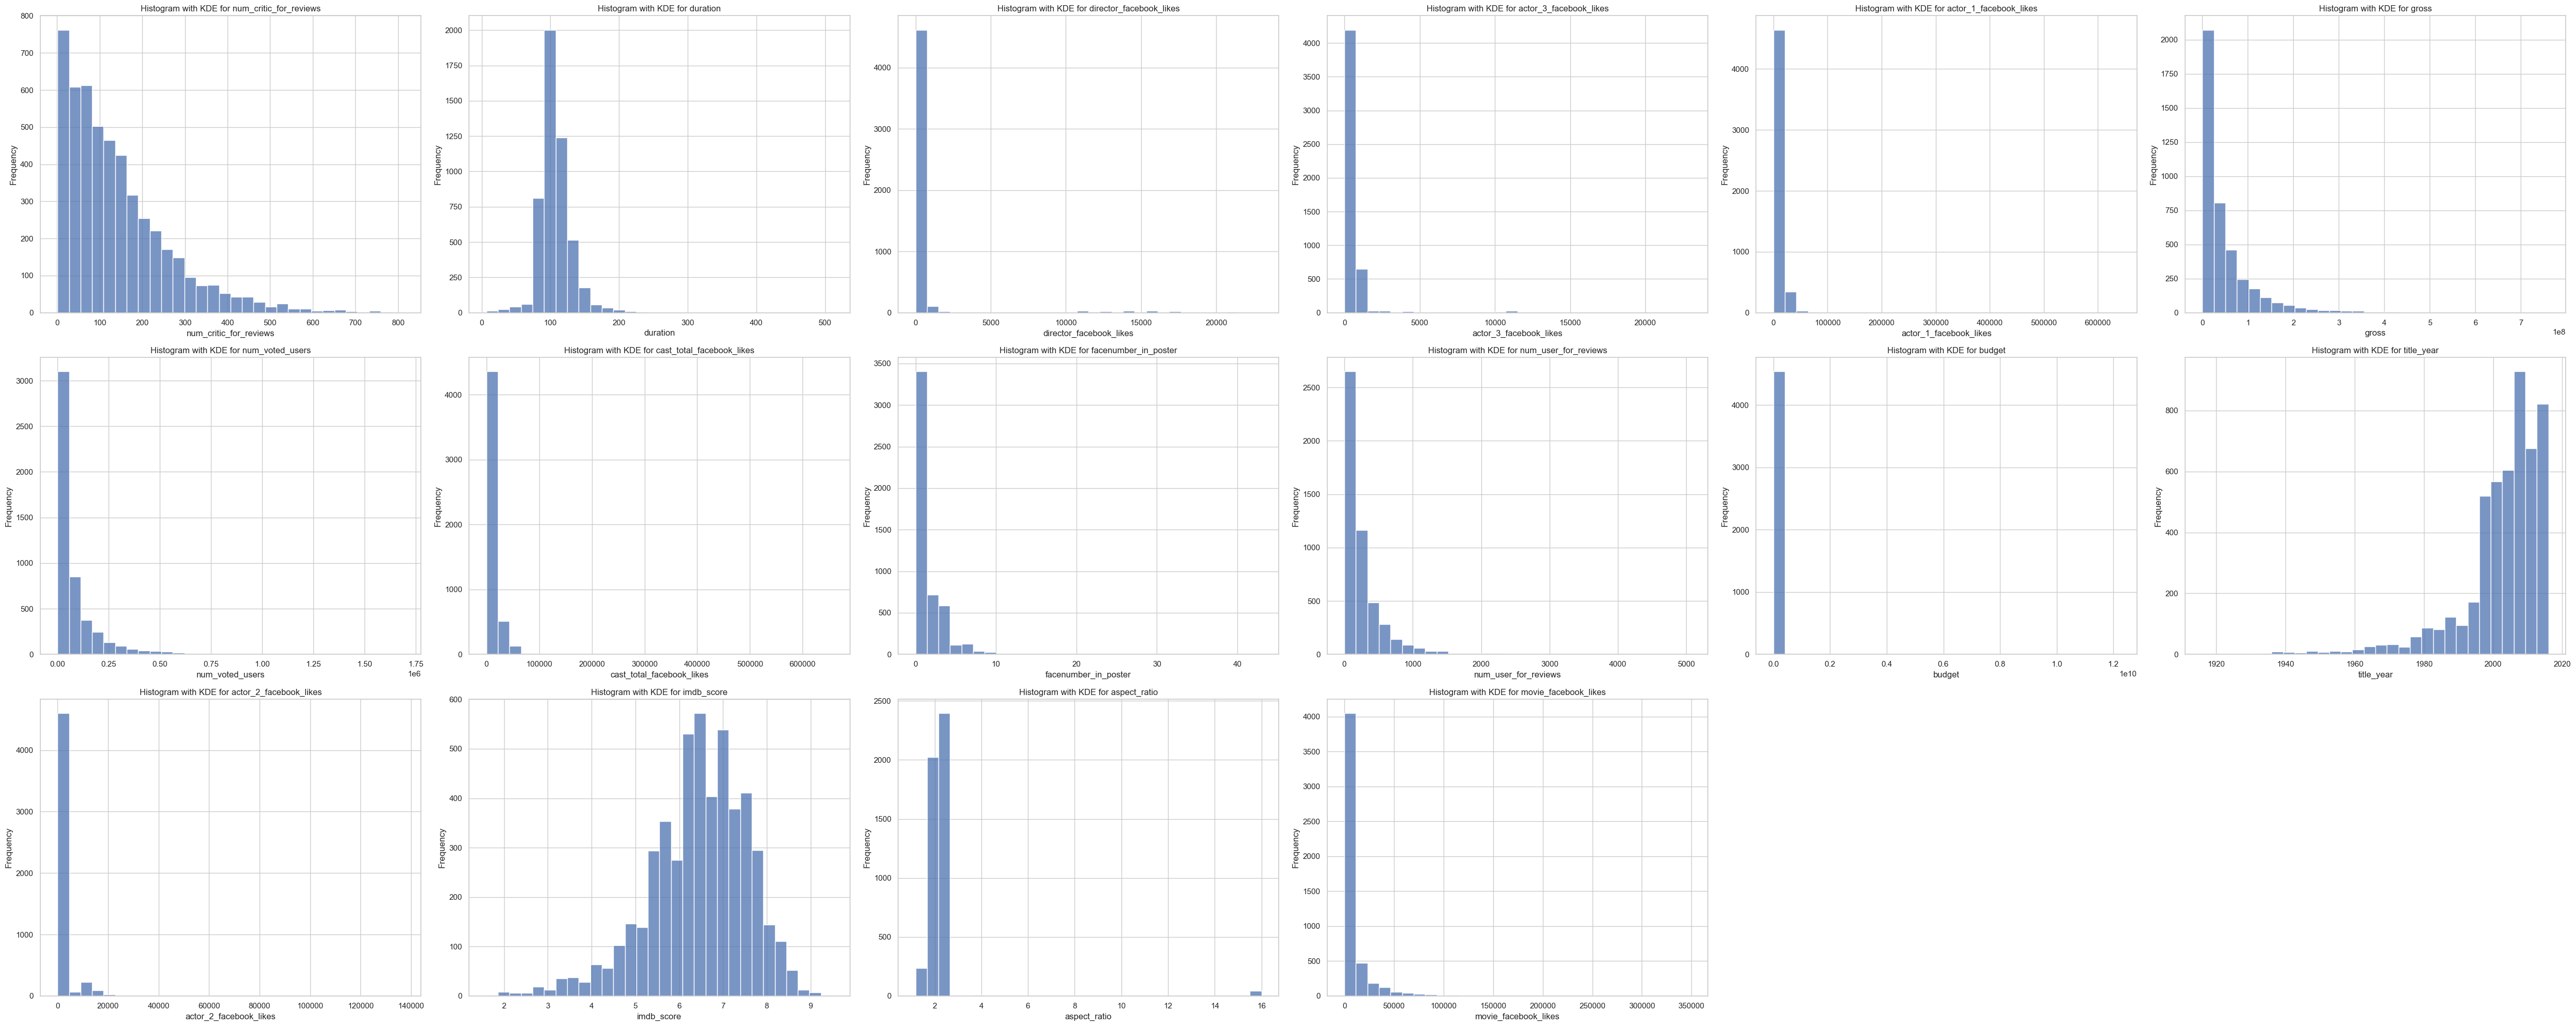

In [30]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Get the number of numerical columns and decide the number of columns in the grid
num_cols = df.select_dtypes(include='number').columns
num_plots = len(num_cols)

# Set the number of columns in the grid (you can adjust this based on your preference)
num_cols_in_grid = 6

# Calculate the number of rows needed
num_rows = (num_plots + num_cols_in_grid - 1) // num_cols_in_grid

# Increase the height of each subplot by adjusting the figsize parameter
fig, axes = plt.subplots(num_rows, num_cols_in_grid, figsize=(50, 20))  # Adjust the figure size as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical column and plot histogram with KDE on a separate subplot
for i, column in enumerate(num_cols):
    sns.histplot(df[column], kde=False, bins=30, ax=axes[i])  # Adjust bins as needed
    axes[i].set_title(f'Histogram with KDE for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots if the number of plots is not a multiple of num_cols_in_grid
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='num_critic_for_reviews', ylabel='Count'>

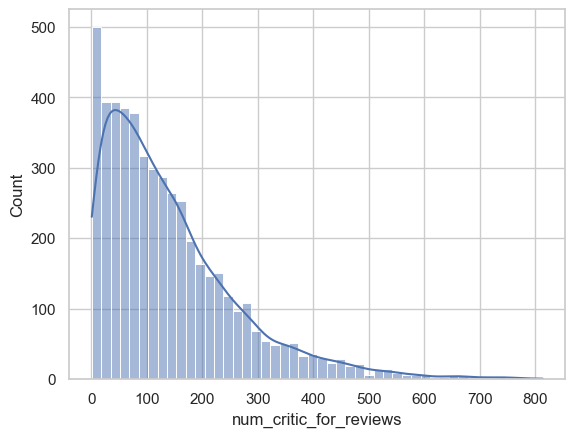

In [31]:
sns.histplot(df["num_critic_for_reviews"], kde=True)

In [32]:
# Get the list of categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Count the number of unique categories for each categorical column
num_categories_dict = {column: [df[column].nunique()] for column in cat_cols}

# Display the results
num_cat_table = pd.DataFrame(num_categories_dict)
num_cat_table.T

,0
director_name,2398
actor_2_name,3032
genres,914
actor_1_name,2097
movie_title,4917
actor_3_name,3521
plot_keywords,4760
movie_imdb_link,4919
language,47
country,65


# Preprocessing

Drop categorical columns:

In [33]:
df = df.drop(columns=cat_cols)

In [34]:
df

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723,178,0,855,1000,760505847,886204,4834,0,3054,237000000,2009,936,8,2,33000
1,302,169,563,1000,40000,309404152,471220,48350,0,1238,300000000,2007,5000,7,2,0
2,602,148,0,161,11000,200074175,275868,11700,1,994,245000000,2015,393,7,2,85000
3,813,164,22000,23000,27000,448130642,1144337,106759,0,2701,250000000,2012,23000,8,2,164000
4,NaN,NaN,131,NaN,131,NaN,8,143,0,NaN,NaN,NaN,12,7,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1,87,2,318,637,NaN,629,2283,2,6,NaN,2013,470,8,NaN,84
5039,43,43,NaN,319,841,NaN,73839,1753,1,359,NaN,NaN,593,8,16,32000
5040,13,76,0,0,0,NaN,38,0,0,3,1400,2013,0,6,NaN,16
5041,14,100,0,489,946,10443,1255,2386,5,9,NaN,2012,719,6,2,660


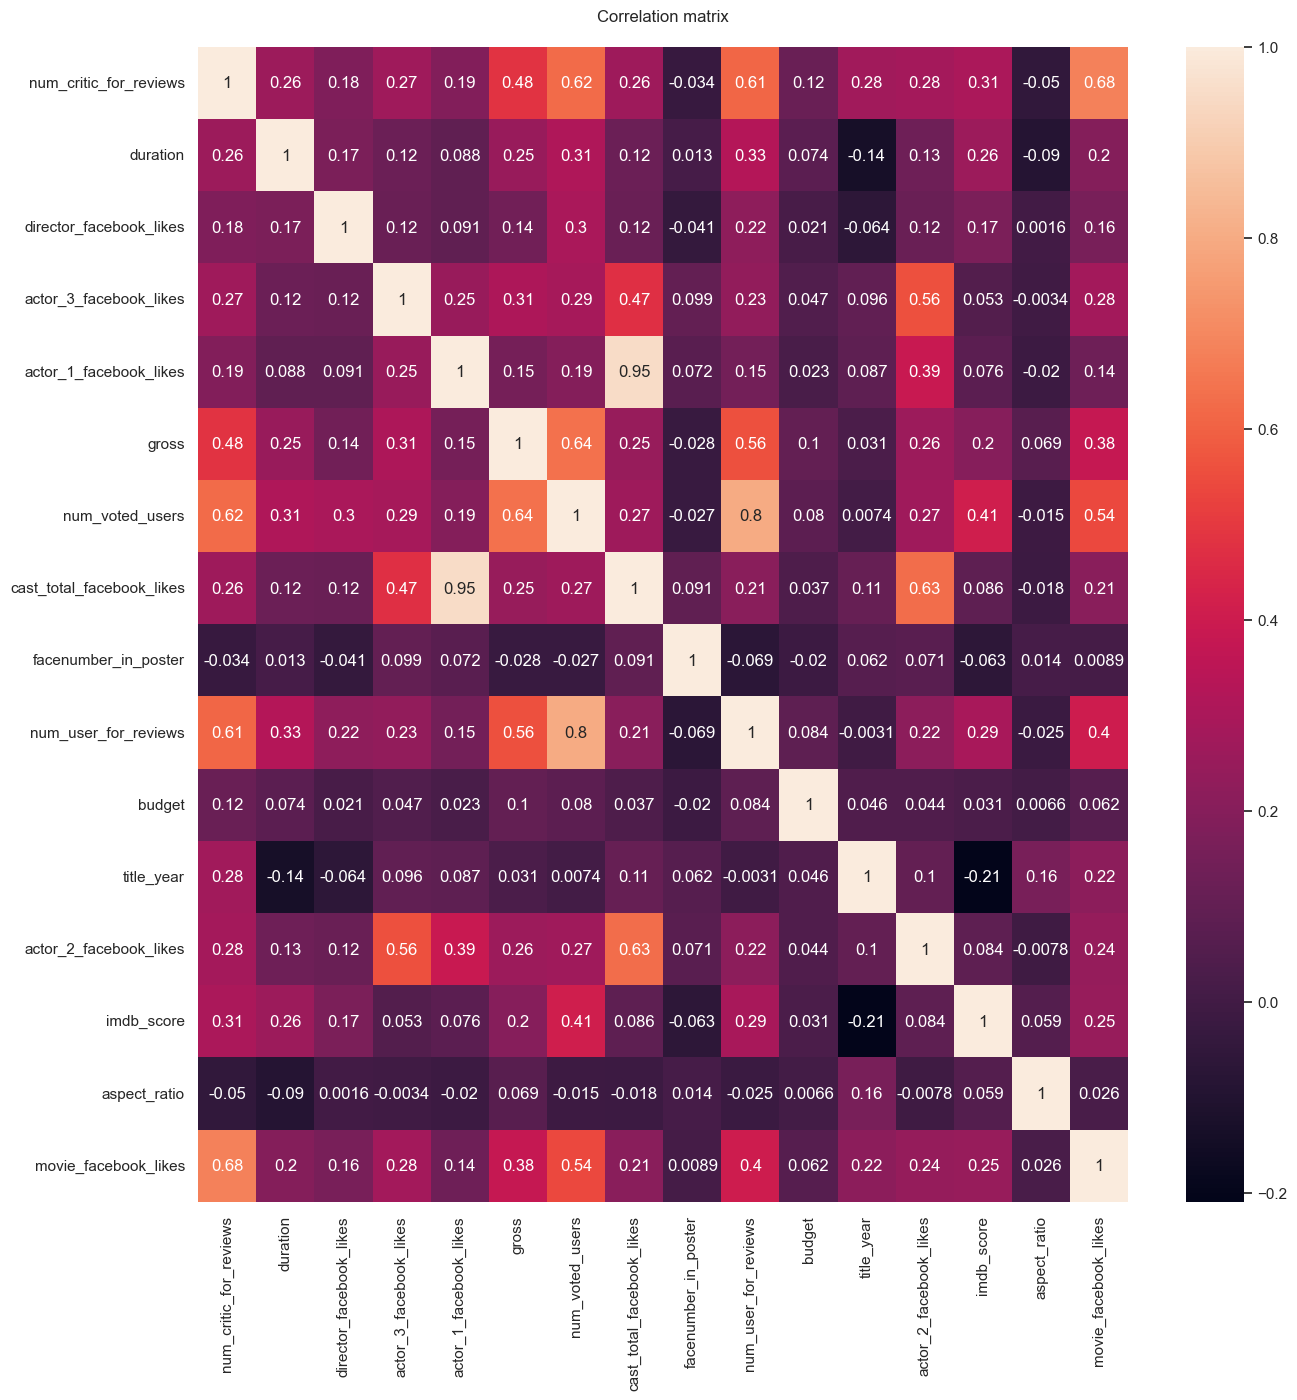

In [35]:
corr = df.corr()
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(corr, annot = True)
heatmap.set(title = "Correlation matrix\n")  
plt.show()  

Drop all columns with low correlation with the label

In [36]:
# Set the target column
target_column = 'num_critic_for_reviews'

# Set the correlation threshold
correlation_threshold = 0.5

# Calculate the correlation between features and the target column
correlation_with_target = df.corr()[target_column]

# Find columns with correlation below the threshold
columns_to_drop = [col for col in correlation_with_target.index if abs(correlation_with_target[col]) < correlation_threshold]
print(columns_to_drop)

df = df.drop(columns=columns_to_drop)

['duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'cast_total_facebook_likes', 'facenumber_in_poster', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio']


In [37]:
df

,num_critic_for_reviews,num_voted_users,num_user_for_reviews,movie_facebook_likes
0,723,886204,3054,33000
1,302,471220,1238,0
2,602,275868,994,85000
3,813,1144337,2701,164000
4,NaN,8,NaN,0
...,...,...,...,...
5038,1,629,6,84
5039,43,73839,359,32000
5040,13,38,3,16
5041,14,1255,9,660


In [38]:
df.isna().sum()

num_critic_for_reviews    50
num_voted_users            0
num_user_for_reviews      21
movie_facebook_likes       0
dtype: int64

Drop rows with NaN "num_critic_for_reviews" 

In [39]:
df.dropna(subset=["num_critic_for_reviews"], inplace=True)

In [40]:
df.isna().sum()

num_critic_for_reviews    0
num_voted_users           0
num_user_for_reviews      0
movie_facebook_likes      0
dtype: int64

In [41]:
if "gross" in df.columns:    
    df.dropna(subset=["gross"], inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4993 entries, 0 to 5042
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_critic_for_reviews  4993 non-null   float64
 1   num_voted_users         4993 non-null   int64  
 2   num_user_for_reviews    4993 non-null   float64
 3   movie_facebook_likes    4993 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 195.0 KB


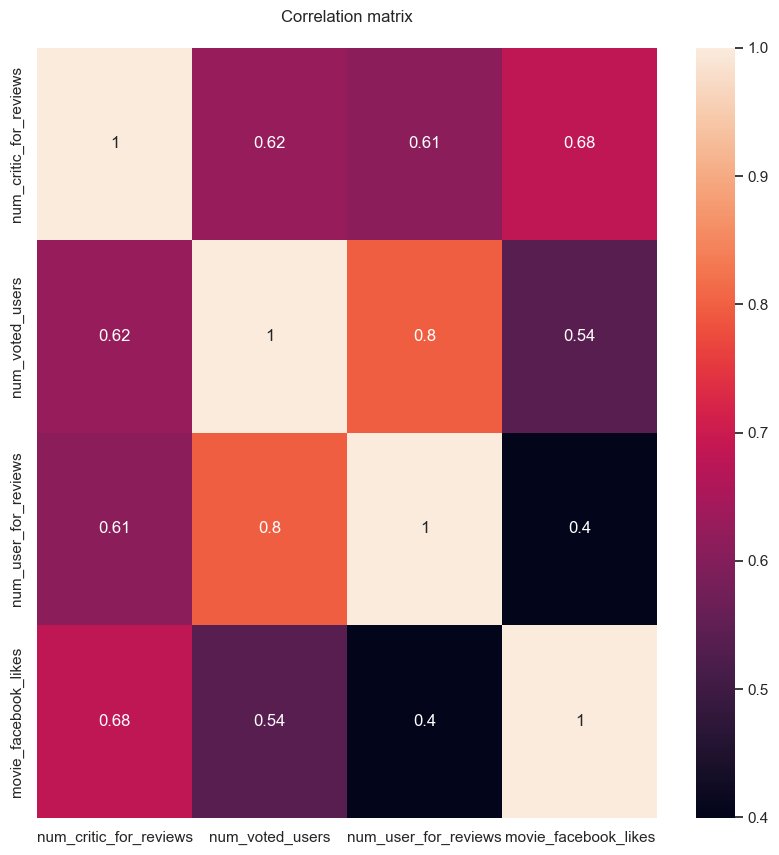

In [43]:
corr = df.corr()
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(corr, annot = True)
heatmap.set(title = "Correlation matrix\n")  
plt.show()  

With such high correlation between "num_user_for_reviews" and "num_voted_users" we can try deselecting one

In [44]:
selected = ["num_user_for_reviews","movie_facebook_likes"]

array([[<AxesSubplot: title={'center': 'num_critic_for_reviews'}>,
        <AxesSubplot: title={'center': 'num_voted_users'}>],
       [<AxesSubplot: title={'center': 'num_user_for_reviews'}>,
        <AxesSubplot: title={'center': 'movie_facebook_likes'}>]],
      dtype=object)

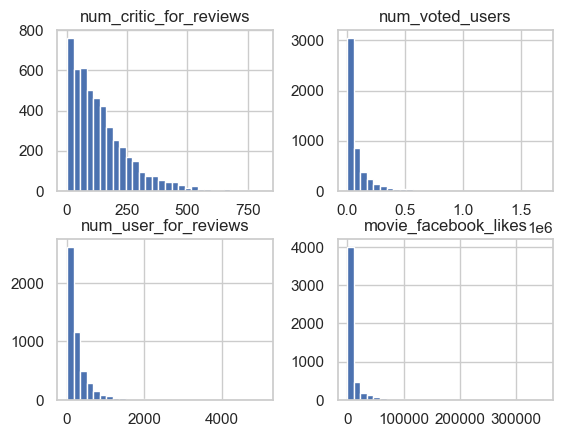

In [45]:
df.hist(bins=30)

Scale the data

In [46]:
features = df.columns[1:]
X = df[features].copy()
X

,num_voted_users,num_user_for_reviews,movie_facebook_likes
0,886204,3054,33000
1,471220,1238,0
2,275868,994,85000
3,1144337,2701,164000
5,212204,738,24000
...,...,...,...
5038,629,6,84
5039,73839,359,32000
5040,38,3,16
5041,1255,9,660


In [47]:
y = df[["num_user_for_reviews"]].copy()
y

,num_user_for_reviews
0,3054
1,1238
2,994
3,2701
5,738
...,...
5038,6
5039,359
5040,3
5041,9


array([[<AxesSubplot: title={'center': 'num_voted_users'}>,
        <AxesSubplot: title={'center': 'num_user_for_reviews'}>],
       [<AxesSubplot: title={'center': 'movie_facebook_likes'}>,
        <AxesSubplot: >]], dtype=object)

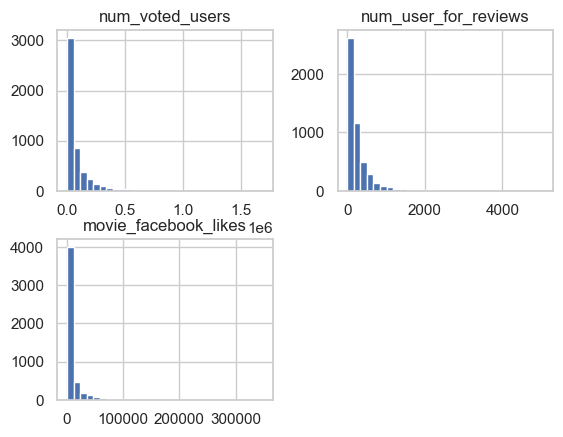

In [48]:
X.hist(bins=30)

In [49]:
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

# Scale all columns in the DataFrame
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,num_voted_users,num_user_for_reviews,movie_facebook_likes
0,1,1,0
1,0,0,0
2,0,0,0
3,1,1,0
4,0,0,0
...,...,...,...
4988,0,0,0
4989,0,0,0
4990,0,0,0
4991,0,0,0


array([[<AxesSubplot: title={'center': 'num_voted_users'}>,
        <AxesSubplot: title={'center': 'num_user_for_reviews'}>],
       [<AxesSubplot: title={'center': 'movie_facebook_likes'}>,
        <AxesSubplot: >]], dtype=object)

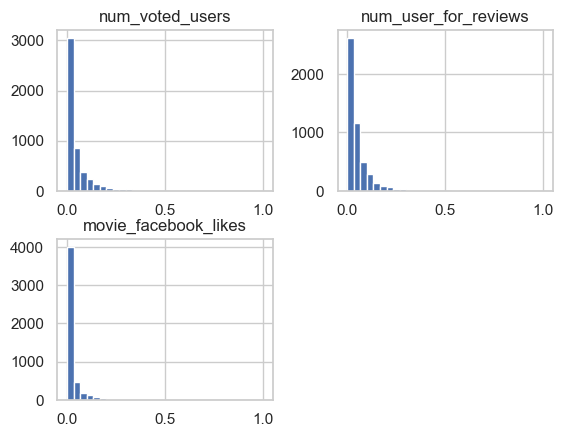

In [50]:
X_scaled.hist(bins=30)

Split train test dataset

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,shuffle=True,random_state=100)
print(len(X_train))
print(len(X_test))

3495
1498


# Model

SGD

In [52]:
# SkLearn SGD classifier
model = SGDRegressor()
model.fit(X_train, y_train)

SGDRegressor()

In [53]:
y_train_pred=pd.DataFrame(model.predict(X_train))
y_test_pred=pd.DataFrame(model.predict(X_test))

In [54]:
def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

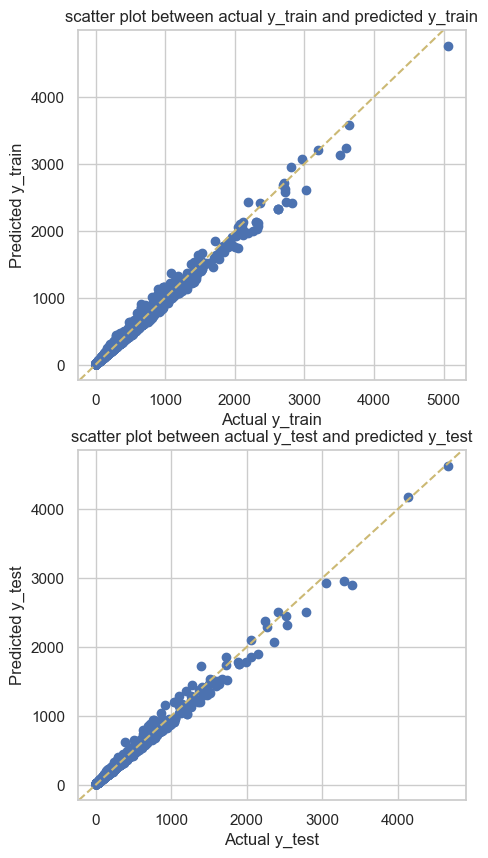

In [55]:
fig,(ax1, ax2)=plt.subplots(2,1,figsize=(5,10))

ax1.scatter(y_train,y_train_pred)
ax1.set_xlabel('Actual y_train')
ax1.set_ylabel('Predicted y_train')
ax1.set_title('scatter plot between actual y_train and predicted y_train')
add_identity(ax1, color='y', ls='--')

ax2.scatter(y_test,y_test_pred)
ax2.set_xlabel('Actual y_test')
ax2.set_ylabel('Predicted y_test')
ax2.set_title('scatter plot between actual y_test and predicted y_test')
add_identity(ax2, color='y', ls='--')
plt.show()

In [56]:
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred))
print('r2 :',metrics.r2_score(y_test, y_test_pred))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred))*(len(X_test)-1)/(len(X_test)-13-1))


mae : 21.64195777464638
mse : 1842.0702764066396
mape : 0.2931698377024516
r2 : 0.9883123714237966
Adjusted r2 : 0.9882099865373474


In [57]:
coef_selected=pd.DataFrame(X_train.columns,columns=['features'])
coef_selected['coefficents']=model.coef_
coef_selected.loc[len(coef_selected)]=['INTERCEPT',model.intercept_[0]]
coef_selected

,features,coefficents
0,num_voted_users,781
1,num_user_for_reviews,4183
2,movie_facebook_likes,-122
3,INTERCEPT,12


In [58]:
ytpf = y_test_pred.to_numpy().flatten()
ytf = y_test.to_numpy().flatten()
np.mean(np.abs(ytpf - ytf)/ytf)

0.2931698377024516

Linear Regression

In [59]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [60]:
y_train_pred_lr=pd.DataFrame(lr.predict(X_train))
y_test_pred_lr=pd.DataFrame(lr.predict(X_test))

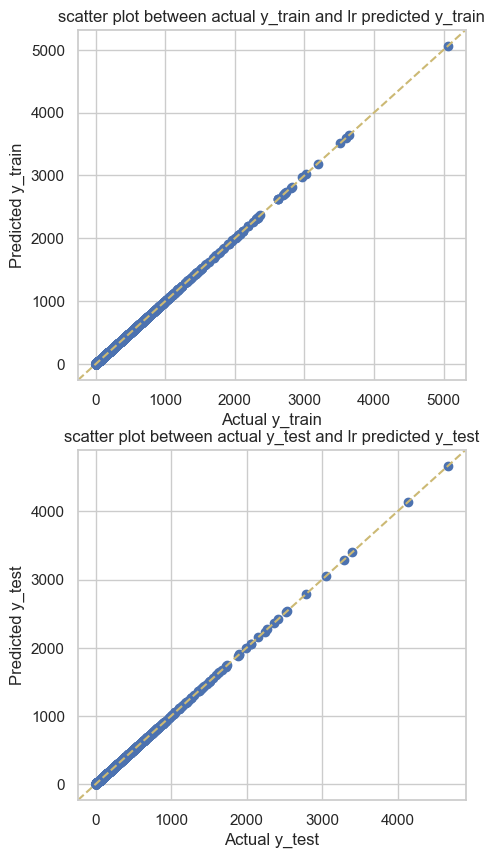

In [61]:
fig,(ax1, ax2)=plt.subplots(2,1,figsize=(5,10))

ax1.scatter(y_train,y_train_pred_lr)
ax1.set_xlabel('Actual y_train')
ax1.set_ylabel('Predicted y_train')
ax1.set_title('scatter plot between actual y_train and lr predicted y_train')
add_identity(ax1, color='y', ls='--')

ax2.scatter(y_test,y_test_pred_lr)
ax2.set_xlabel('Actual y_test')
ax2.set_ylabel('Predicted y_test')
ax2.set_title('scatter plot between actual y_test and lr predicted y_test')
add_identity(ax2, color='y', ls='--')
plt.show()

In [64]:
coef_selected=pd.DataFrame(X_train.columns,columns=['features'])
coef_selected['coefficents']=lr.coef_[0]
coef_selected.loc[len(coef_selected)]=['INTERCEPT',lr.intercept_[0]]
coef_selected

,features,coefficents
0,num_voted_users,0
1,num_user_for_reviews,5059
2,movie_facebook_likes,0
3,INTERCEPT,1


In [65]:
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred_lr))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred_lr))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred_lr))
print('r2 :',metrics.r2_score(y_test, y_test_pred_lr))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred_lr))*(len(X_test)-1)/(len(X_test)-13-1))

mae : 3.1017756231756977e-13
mse : 2.4640168170060997e-25
mape : 9.131285233277941e-15
r2 : 1.0
Adjusted r2 : 1.0


Overfit!

Now let us try using just the selcted columns

In [66]:
# SkLearn SGD classifier
model2 = SGDRegressor()
model2.fit(X_train[selected], y_train)

SGDRegressor()

In [67]:
y_train_pred_2=pd.DataFrame(model2.predict(X_train[selected]))
y_test_pred_2=pd.DataFrame(model2.predict(X_test[selected]))

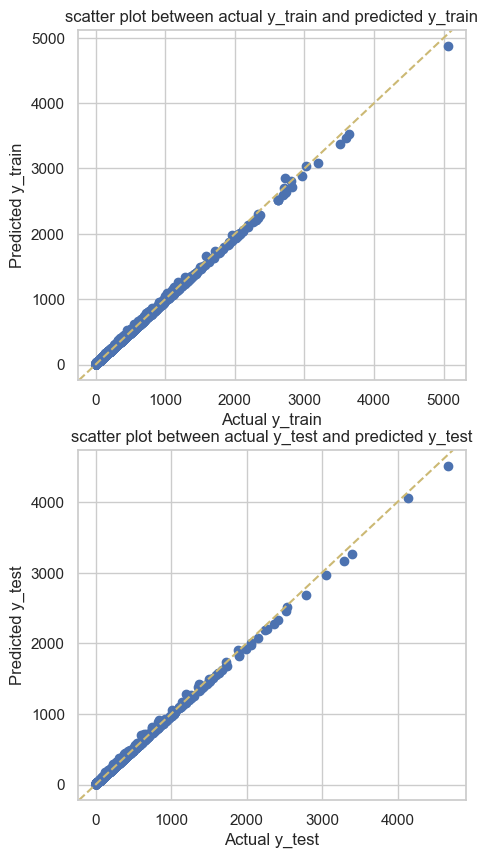

In [68]:
fig,(ax1, ax2)=plt.subplots(2,1,figsize=(5,10))

ax1.scatter(y_train,y_train_pred_2)
ax1.set_xlabel('Actual y_train')
ax1.set_ylabel('Predicted y_train')
ax1.set_title('scatter plot between actual y_train and predicted y_train')
add_identity(ax1, color='y', ls='--')

ax2.scatter(y_test,y_test_pred_2)
ax2.set_xlabel('Actual y_test')
ax2.set_ylabel('Predicted y_test')
ax2.set_title('scatter plot between actual y_test and predicted y_test')
add_identity(ax2, color='y', ls='--')
plt.show()

In [91]:
coef_selected=pd.DataFrame(X_train[selected].columns,columns=['features'])
coef_selected['coefficents']=model2.coef_
coef_selected.loc[len(coef_selected)]=['INTERCEPT',model2.intercept_[0]]
coef_selected

,features,coefficents
0,num_user_for_reviews,4856
1,movie_facebook_likes,227
2,INTERCEPT,7


In [72]:
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred_2))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred_2))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred_2))
print('r2 :',metrics.r2_score(y_test, y_test_pred_2))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred_2))*(len(X_test)-1)/(len(X_test)-13-1))

mae : 8.928176324288945
mse : 265.7334783834466
mape : 0.16289236244643923
r2 : 0.9983139654141389
Adjusted r2 : 0.998299195569384


Overfit!

Focus on the original model

# Hyperparameter Tuning

GridCV

In [73]:
a=['constant', 'optimal', 'invscaling']
c = [0.00001,0.0001,0.001,0.01,0.1,0.2,0.3]
param_grid = dict(learning_rate=a,eta0=c)
lr3=SGDRegressor(penalty=None)
grid = GridSearchCV(estimator=lr3, param_grid=param_grid, cv=5,scoring='r2')
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
grid.get_params(deep=True)

Best Score:  0.999999999999566
Best Params:  {'eta0': 0.3, 'learning_rate': 'constant'}


{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 0.0001,
 'estimator__average': False,
 'estimator__early_stopping': False,
 'estimator__epsilon': 0.1,
 'estimator__eta0': 0.01,
 'estimator__fit_intercept': True,
 'estimator__l1_ratio': 0.15,
 'estimator__learning_rate': 'invscaling',
 'estimator__loss': 'squared_error',
 'estimator__max_iter': 1000,
 'estimator__n_iter_no_change': 5,
 'estimator__penalty': None,
 'estimator__power_t': 0.25,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__tol': 0.001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': SGDRegressor(penalty=None),
 'n_jobs': None,
 'param_grid': {'learning_rate': ['constant', 'optimal', 'invscaling'],
  'eta0': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'r2',
 'verbose': 0}

In [74]:
y_test_pred_cv=grid.predict(X_test)
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred_cv))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred_cv))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred_cv))
print('r2 :',metrics.r2_score(y_test, y_test_pred_cv))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred_cv))*(len(X_test)-1)/(len(X_test)-4-1))

mae : 3.592936371512118e-05
mse : 4.98674661305921e-09
mape : 2.3833558774355015e-07
r2 : 0.9999999999999684
Adjusted r2 : 0.9999999999999682


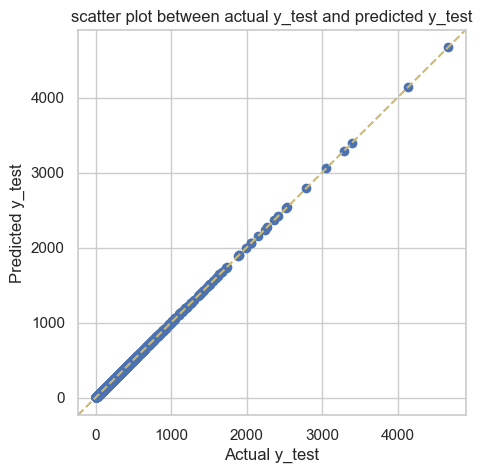

In [75]:
fig,ax2=plt.subplots(1,1,figsize=(5,5))

ax2.scatter(y_test,y_test_pred_cv)
ax2.set_xlabel('Actual y_test')
ax2.set_ylabel('Predicted y_test')
ax2.set_title('scatter plot between actual y_test and predicted y_test')
add_identity(ax2, color='y', ls='--')
plt.show()

In [76]:
coef_gridcv=pd.DataFrame(X_train.columns,columns=['features'])
coef_gridcv['coefficents']=grid.best_estimator_.coef_
coef_gridcv.loc[len(coef_gridcv)]=['INTERCEPT',grid.best_estimator_.intercept_[0]]
coef_gridcv

,features,coefficents
0,num_voted_users,0
1,num_user_for_reviews,5059
2,movie_facebook_likes,-0
3,INTERCEPT,1


LassoCV

In [77]:
lr_lasso=LassoCV(cv=5,random_state=100,max_iter=10000)
lr_lasso.fit(X_train, y_train)
y_test_pred_lasso=pd.DataFrame(lr_lasso.predict(X_test))
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred_lasso))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred_lasso))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred_lasso))
print('r2 :',metrics.r2_score(y_test, y_test_pred_lasso))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred_lasso))*(len(X_test)-1)/(len(X_test)-4-1))

mae : 0.23347844737183754
mse : 0.15773487420825336
mape : 0.006981887273174615
r2 : 0.9999989991985393
Adjusted r2 : 0.9999989965172226


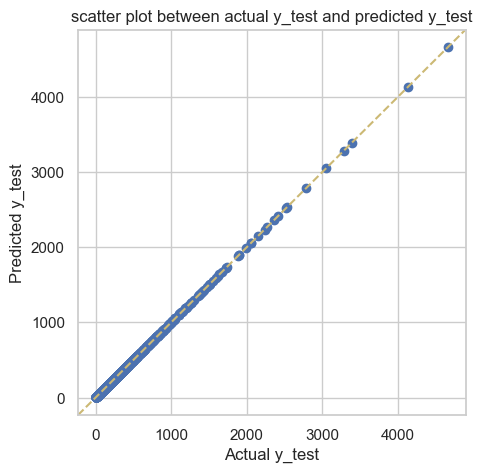

In [78]:
fig,ax2=plt.subplots(1,1,figsize=(5,5))

ax2.scatter(y_test,y_test_pred_lasso)
ax2.set_xlabel('Actual y_test')
ax2.set_ylabel('Predicted y_test')
ax2.set_title('scatter plot between actual y_test and predicted y_test')
add_identity(ax2, color='y', ls='--')
plt.show()

In [79]:
coef_lasso=pd.DataFrame(X_train.columns,columns=['features'])
coef_lasso['coefficents']=lr_lasso.coef_
coef_lasso.loc[len(coef_lasso)]=['INTERCEPT',lr_lasso.intercept_]
coef_lasso

,features,coefficents
0,num_voted_users,0
1,num_user_for_reviews,5054
2,movie_facebook_likes,0
3,INTERCEPT,1


RidgeCV

In [80]:
lr_ridge=RidgeCV(cv=5)
lr_ridge.fit(X_train, y_train)
y_test_pred_ridge=pd.DataFrame(lr_ridge.predict(X_test))
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred_ridge))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred_ridge))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred_ridge))
print('r2 :',metrics.r2_score(y_test, y_test_pred_ridge))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred_ridge))*(len(X_test)-1)/(len(X_test)-4-1))

mae : 1.8207418407274625
mse : 12.139945155578754
mape : 0.034011926420982316
r2 : 0.9999229740733938
Adjusted r2 : 0.9999227677078838


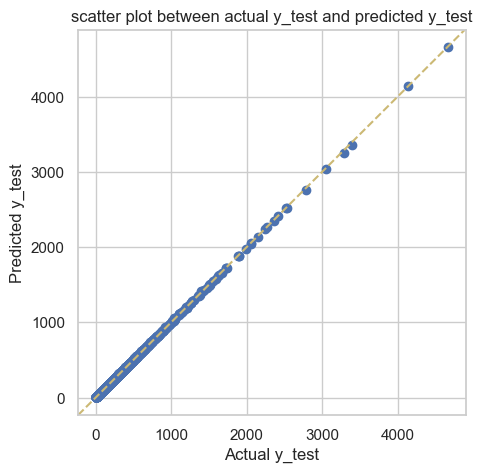

In [81]:
fig,ax2=plt.subplots(1,1,figsize=(5,5))

ax2.scatter(y_test,y_test_pred_ridge)
ax2.set_xlabel('Actual y_test')
ax2.set_ylabel('Predicted y_test')
ax2.set_title('scatter plot between actual y_test and predicted y_test')
add_identity(ax2, color='y', ls='--')
plt.show()

In [82]:
coef_ridge=pd.DataFrame(X_train.columns,columns=['features'])
coef_ridge['coefficents']=lr_ridge.coef_[0]
coef_ridge.loc[len(coef_ridge)]=['INTERCEPT',lr_ridge.intercept_[0]]
coef_ridge

,features,coefficents
0,num_voted_users,55
1,num_user_for_reviews,4986
2,movie_facebook_likes,-4
3,INTERCEPT,2


In [83]:
lr_ridge.coef_

array([[ 5.48591804e+01,  4.98565353e+03, -3.94703816e+00]])

ElasticCV

In [84]:
lr_elastic=ElasticNetCV(cv=5)
lr_elastic.fit(X_train, y_train)
y_test_pred_elastic=pd.DataFrame(lr_elastic.predict(X_test))
print('mae :',metrics.mean_absolute_error(y_test, y_test_pred_elastic))
print('mse :',metrics.mean_squared_error(y_test, y_test_pred_elastic))
print('mape :',metrics.mean_absolute_percentage_error(y_test, y_test_pred_elastic))
print('r2 :',metrics.r2_score(y_test, y_test_pred_elastic))
print('Adjusted r2 :',1-(1-metrics.r2_score(y_test, y_test_pred_elastic))*(len(X_test)-1)/(len(X_test)-4-1))

mae : 170.17263855006502
mse : 87824.88947310405
mape : 5.092569020979063
r2 : 0.4427657288352178
Adjusted r2 : 0.4412728037952586


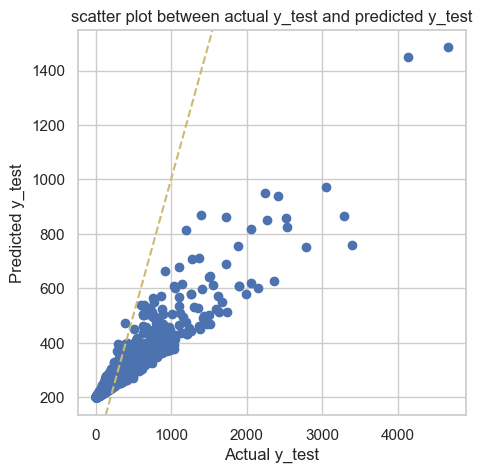

In [85]:
fig,ax2=plt.subplots(1,1,figsize=(5,5))

ax2.scatter(y_test,y_test_pred_elastic)
ax2.set_xlabel('Actual y_test')
ax2.set_ylabel('Predicted y_test')
ax2.set_title('scatter plot between actual y_test and predicted y_test')
add_identity(ax2, color='y', ls='--')
plt.show()

In [86]:
coef_elastic=pd.DataFrame(X_train.columns,columns=['features'])
coef_elastic['coefficents']=lr_elastic.coef_[0]
coef_elastic.loc[len(coef_elastic)]=['INTERCEPT',lr_elastic.intercept_]
coef_elastic

,features,coefficents
0,num_voted_users,589
1,num_user_for_reviews,589
2,movie_facebook_likes,589
3,INTERCEPT,198


In [87]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=SGDRegressor(penalty='elasticnet')).fit(X_train, y_train)

In [88]:
X_train.columns[selector.get_support(indices=True)]

Index(['num_user_for_reviews'], dtype='object')

In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k=3)
# learn relationship from training data
fs.fit(X_train, y_train)
X_train.columns[fs.get_support(indices=True)]

Index(['num_voted_users', 'num_user_for_reviews', 'movie_facebook_likes'], dtype='object')